## Predicting CO2 Emmision values of car based on Engine Size 

In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('FuelConsumption.csv')   # reading datafile in Pandas dataframe 

In [3]:
df.head()   # showing top 5 lines of the data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()   # showing data in depth

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
df_new = df[['ENGINESIZE' , 'CO2EMISSIONS']]
df_new.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


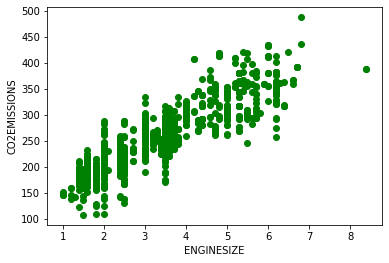

In [97]:
# Visualizing data using Scatter Plot

plt.scatter(df_new['ENGINESIZE'] ,df_new['CO2EMISSIONS'] ,  color='green')
plt.ylabel('CO2EMISSIONS')
plt.xlabel('ENGINESIZE')
plt.show()

In [72]:
# Model using Simple Linear Regression Algorithm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()

X = df[['ENGINESIZE']]
y = df[['CO2EMISSIONS']]

x_train,x_test,y_train,y_test = train_test_split(X , y , test_size = 0.3 , random_state=0)

model.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
model.intercept_

array([125.55268333])

In [74]:
model.coef_

array([[39.64771341]])

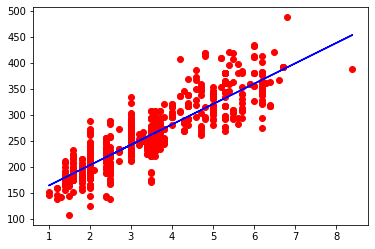

In [104]:
plt.scatter(x_train,y_train , color='red')
plt.plot(x_train,39.12519979*x_train + 125.3040995,color='blue')   # Plotting Linear Regression line

In [77]:
yhat = model.predict(x_test)              # Making prediction

In [79]:
yhat[0:5]

array([[343.61510708],
       [220.70719552],
       [220.70719552],
       [232.60150954],
       [224.67196686]])

In [95]:
# Calculating R-score

In [96]:
from sklearn.metrics import r2_score


r2_score(yhat,y_test)


0.6593312124022929

### Since R-squared value is greater than 0.5  which means that our model's prediction can be considered but model is not efficient.